# First neural network
We will analize the effect of different hyperparameters on model performance using digits classification dataset

In [51]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sn

In [52]:
def run_tensorboard(logdir_absolute):

   import os, threading
   tb_thread = threading.Thread(
          target=lambda: os.system('/home/maxibeckel/github/neural-network-examples/.venv/bin/tensorboard '
                                   '--logdir=' + logdir_absolute),
          daemon=True)
   tb_thread.start()

In [53]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [54]:
print(f"X_train: {len(X_train)}\nX_test: {len(X_test)}")

X_train: 60000
X_test: 10000


In [55]:
X_train[0].shape

(28, 28)

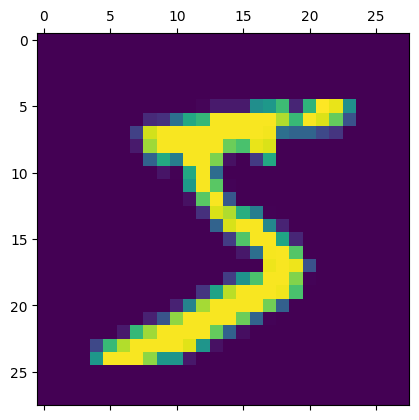

In [56]:
plt.matshow(X_train[0])

In [57]:
X_train = X_train / 255
X_test = X_test / 255

## First Model
1- 1 hidden layer with 100 neurons and relu activation function
2- optimizer = adam
3- loss = sparse_categorical_crossentropy

In [58]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/SGD", histogram_freq=1)

model.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=10, callbacks=[tb_callback])

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6841 - accuracy: 0.8270
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3411 - accuracy: 0.9043
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2912 - accuracy: 0.9178
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2601 - accuracy: 0.9267
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2368 - accuracy: 0.9334
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2180 - accuracy: 0.9387
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2025 - accuracy: 0.9431
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1894 - accuracy: 0.9471
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1778 - accuracy: 0.9506
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.168

In [59]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/adam", histogram_freq=1)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=10, callbacks=[tb_callback])

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2747 - accuracy: 0.9226
Epoch 2/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1236 - accuracy: 0.9636
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0851 - accuracy: 0.9748
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0653 - accuracy: 0.9803
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0511 - accuracy: 0.9843
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0413 - accuracy: 0.9870
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0345 - accuracy: 0.9893
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0270 - accuracy: 0.9919
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0232 - accuracy: 0.9931
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.019

In [60]:
run_tensorboard(logdir_absolute="/home/maxibeckel/github/neural-network-examples/logs/")

In [61]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0767 - accuracy: 0.9778


[0.07671205699443817, 0.9778000116348267]

2024-03-08 20:22:31.290764: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.


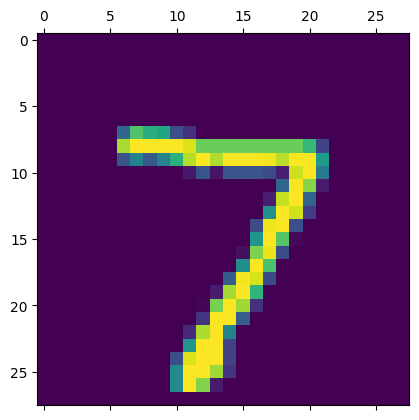

In [62]:
plt.matshow(X_test[0])

In [63]:
y_pred = model.predict(X_test)

2024-03-08 20:22:31.402809: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-08 20:22:31.403469: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


313/313 [==============================] - 1s 2ms/step


In [64]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [65]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)

Text(70.72222222222221, 0.5, 'Truth')

2024-03-08 20:22:32.576796: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


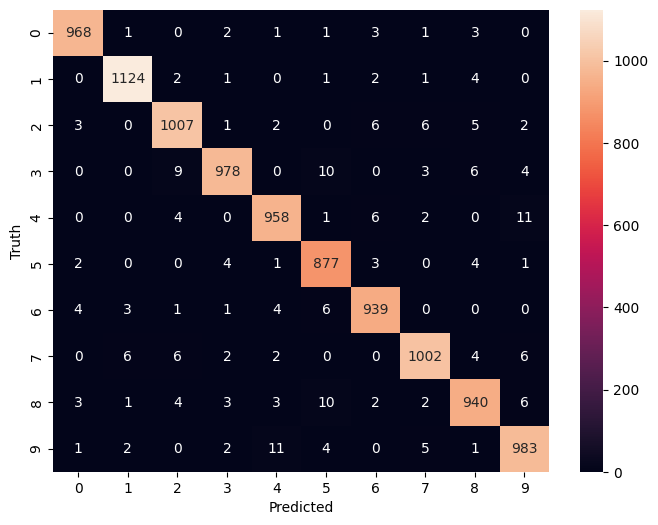

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.13.0 at http://localhost:6006/ (Press CTRL+C to quit)


In [66]:
plt.figure(figsize=(8,6))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')